In [1]:
import numpy as np
import pandas as pd
from astropy.io import ascii
import os
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from cluster_tools import corr_plx, quality_filter, movprop_filter, quality2_filter
import cmasher as cmr

In [11]:
data = ascii.read("ngc1027_probs.csv")
data = ascii.read("ngc1027_probs.csv")
data_mm = ascii.read("match_marie&mateus")
data_mh = ascii.read("match_marie&hunt")

In [15]:
kk, = np.where(data["flag_member"]== 1.)

In [16]:
data[kk]

RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx,e_Plx,PM_1,pmRA,e_pmRA,pmDE,e_pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,e_RV,ELAT,RAJ2000,DEJ2000,phot_bp_rp_excess_factor_2a,phot_bp_rp_excess_factor_corr,Plx_corr,probs_final,flag_member
float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
41.570274,61.17341,464949661706849280,0.023,0.0273,0.83,0.0378,2.577,-1.596,0.035,2.023,0.036,31,1.44,0.0,1.041,16.192581,16.815716,15.430469,1.385247,0.0,0.0,42.572998,41.57029,61.1734,1.2578142,0.0010411378,0.858649,0.9632,1.0
41.6545,61.223747,464950211462625792,0.0288,0.0335,0.9554,0.0447,2.603,-1.741,0.042,1.936,0.043,31,1.433,0.0,0.919,16.519371,17.16683,15.747625,1.419205,0.0,0.0,42.602654,41.654514,61.223736,1.2563318,-0.004343523,0.984442,0.9689,1.0
40.922413,61.09424,465602702895244800,0.0198,0.0256,0.9349,0.0354,2.764,-1.855,0.032,2.05,0.036,31,1.455,0.0,1.014,15.765883,16.284992,14.968859,1.316134,0.0,0.0,42.627735,40.922432,61.09423,1.3266438,0.077634834,0.967899,0.9791,1.0
41.351025,61.088142,465604347861965952,0.1137,0.1272,0.8615,0.192,2.795,-1.924,0.171,2.028,0.167,31,1.306,0.0,1.01,18.83131,19.97888,17.80428,2.174601,0.0,0.0,42.53786,41.35104,61.08813,1.3360099,-0.023388771,0.879795,0.8785,1.0
41.0488,61.210896,465609536182815360,0.0728,0.0797,0.8934,0.1147,2.763,-1.796,0.12,2.1,0.109,31,1.353,0.0,1.031,17.792515,18.752975,16.841764,1.911211,0.0,0.0,42.70932,41.048817,61.210888,1.3098663,-0.012920828,0.923362,0.9831,1.0
41.110027,61.258606,465610085938776192,0.0508,0.0585,0.8548,0.0802,2.767,-1.659,0.082,2.214,0.079,31,1.386,0.0,1.023,17.37448,18.181145,16.491581,1.689564,0.0,0.0,42.740845,41.110043,61.258595,1.2942164,0.00059348886,0.886151,0.9807,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39.860497,62.075317,465893283202122624,0.0244,0.0295,0.8818,0.0421,2.821,-1.427,0.042,2.433,0.041,31,1.448,0.0,0.972,16.018957,16.614326,15.27324,1.341086,0.0,0.0,43.730045,39.86051,62.075306,1.2556678,0.0038837665,0.911838,0.9999,1.0
39.903316,62.06914,465893592439768320,0.0204,0.0262,0.9084,0.0355,2.788,-1.854,0.033,2.083,0.036,31,1.438,0.0,1.056,15.574017,16.203865,14.79958,1.404285,0.0,0.0,43.715977,39.903336,62.069134,1.2649904,0.006036566,0.941404,0.9808,1.0


In [25]:
mateus,= np.where(data_mm["flg_member"]==1.)
marie, = np.where(data_mm["flag_member"]==1.)
marie_mateus, = np.where((data_mm["flg_member"]==1.)&(data_mm["flag_member"]==1.))

In [26]:
ra_mm = data_mm["RAJ2000"][marie_mateus]
de_mm = data_mm["DEJ2000"][marie_mateus]
pmra_mm = data_mm["pmRA_2"][marie_mateus]
pmde_mm = data_mm["pmDE"][marie_mateus]

In [41]:
len(pmde_mm)

407

In [27]:
data_mm

ID,source_id,RA_J2016,DEC_J2016,plx_1,e_plx_1,pmRA_1,e_pmRA_1,pmDEC,e_pmDEC,Gmag_1,e_Gmag,BPmag_1,e_BPmag,RPmag_1,e_RPmag,chi^2,NgAL,E(BP/RP),Nper,pmRApmDECcor,plxpmRAcor,plxpmDECcor,prob_astrometrica,flg_member,RA_ICRS,DE_ICRS,Source,e_RA_ICRS,e_DE_ICRS,Plx_2,e_Plx_2,PM_1,pmRA_2,e_pmRA_2,pmDE,e_pmDE,Solved,nueff,pscol,RUWE,Gmag_2,BPmag_2,RPmag_2,BP-RP,RV,e_RV,ELAT,RAJ2000,DEJ2000,phot_bp_rp_excess_factor_2a,phot_bp_rp_excess_factor_corr,Plx_corr,probs_final,flag_member
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
192587,465723099410057216,41.1345655,61.5693982,0.9105,0.0569,-1.711,0.055,2.03,0.057,16.8831,0.0007,17.5544,0.0044,16.0873,0.0023,586.27,511.0,0.001,24.0,-0.0716,0.0533,0.0269,1.0,1,41.134567,61.569397,465723099410057216,0.0354,0.0414,0.8809,0.0569,2.655,-1.711,0.055,2.03,0.057,31,1.422,0.0,1.053,16.883118,17.554436,16.087263,1.467173,0.0,0.0,43.019665,41.134583,61.56939,1.266888,0.0006054933,0.91047,0.9927,1.0
192981,465723614814967936,41.0297419,61.5674251,0.8953,0.0337,-1.741,0.032,2.043,0.033,15.8512,0.0005,16.3976,0.0029,15.1431,0.0019,541.32,521.0,0.004,23.0,-0.0274,-0.0605,-0.0195,1.0,1,41.029743,61.567425,465723614814967936,0.0206,0.025,0.8627,0.0337,2.684,-1.741,0.032,2.043,0.033,31,1.466,0.0,1.003,15.851207,16.39761,15.143051,1.254559,0.0,0.0,43.038338,41.02976,61.567417,1.2465546,0.004253567,0.895366,0.9963,1.0
193142,465723889684034688,40.9992684,61.5910299,0.8516,0.0472,-1.756,0.044,2.335,0.045,16.5359,0.0007,17.184,0.0102,15.6044,0.0101,533.82,513.0,0.112,24.0,-0.1018,-0.0047,0.0707,0.90468,1,40.999268,61.59103,465723889684034688,0.0287,0.0344,0.8222,0.0472,2.921,-1.756,0.044,2.335,0.045,31,1.417,0.0,1.003,16.535875,17.183992,15.6044,1.579593,0.0,0.0,43.065815,40.999287,61.59102,1.3918922,0.11205363,0.8515900000000001,0.992,1.0
193157,465723889692626688,40.9907511,61.5896588,0.9443,0.0143,-1.722,0.014,2.122,0.014,13.8023,0.0002,14.1281,0.0008,13.3034,0.0008,633.34,548.0,0.002,24.0,-0.087,0.0371,0.0193,0.96972,1,40.99075,61.58966,465723889692626688,0.0089,0.0106,0.9111,0.0143,2.733,-1.722,0.014,2.122,0.014,31,1.555,0.0,1.076,13.802278,14.128141,13.303386,0.824756,0.0,0.0,43.06623,40.99077,61.58965,1.2036369,0.0019717736,0.9442900000000001,0.9984,1.0
193206,465724027131571584,41.0699956,61.5926911,0.7612,0.0339,-1.734,0.032,2.133,0.033,15.851,0.0003,16.4069,0.0025,15.1317,0.0015,578.35,526.0,0.006,23.0,-0.1093,-0.0464,0.0328,0.96972,1,41.069996,61.59269,465724027131571584,0.0198,0.0244,0.7285,0.0339,2.749,-1.734,0.032,2.133,0.033,31,1.462,0.0,1.032,15.850971,16.406942,15.131738,1.275205,0.0,0.0,43.053513,41.07001,61.59268,1.250995,0.006467334,0.761216,0.9945,1.0
193320,465724198930251904,41.0746399,61.6123831,0.8936,0.0227,-1.735,0.023,2.242,0.022,14.8619,0.0002,15.336,0.0012,14.2125,0.0009,552.94,491.0,0.005,23.0,-0.1155,-0.0776,0.0184,0.96972,1,41.07464,61.612385,465724198930251904,0.0139,0.0165,0.8607,0.0227,2.835,-1.735,0.023,2.242,0.022,31,1.492,0.0,1.051,14.861914,15.335998,14.212507,1.12349,-45.03,5.43,43.07056,41.074657,61.612373,1.234188,0.005470135,0.8936270000000001,0.9962,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
403736,465720144481181568,41.3588193,61.4869373,0.9977,0.0533,-1.616,0.053,2.166,0.058,16.8323,0.001,17.5318,0.0062,16.0153,0.0036,561.17,527.0,0.002,23.0,0.022,0.1444,0.1179,0.91881,1,41.358818,61.48694,465720144481181568,0.0319,0.0396,0.9681,0.0533,2.703,-1.616,0.053,2.166,0.058,31,1.417,0.0,1.014,16.83231,17.531763,16.01529,

## Comparando as populações Marie e Mateus

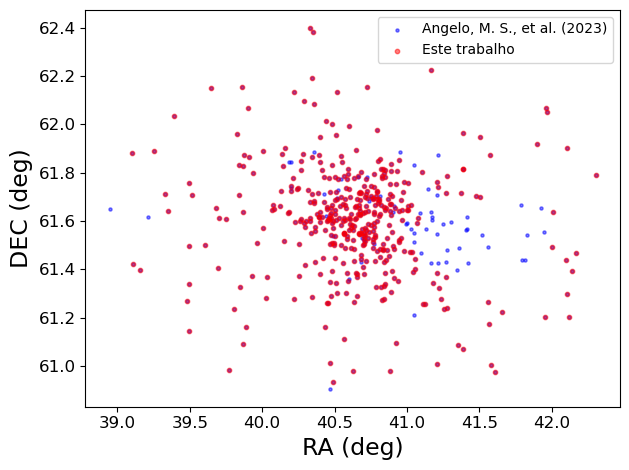

In [46]:
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

img = ax1.scatter(data_mm["RAJ2000"][mateus], data_mm["DEJ2000"][mateus],color='blue',alpha=0.5,s=5,label='Angelo, M. S., et al. (2023)')
ax1.scatter(data_mm["RAJ2000"][marie], data_mm["DEJ2000"][marie],color='red',alpha=0.5,s=10,label='Este trabalho')
#ax1.scatter(ra_mm, de_mm,color='blue',alpha=0.5,s=5)
ax1.set_ylabel("DEC (deg)",fontsize=17)
ax1.set_xlabel("RA (deg)",fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

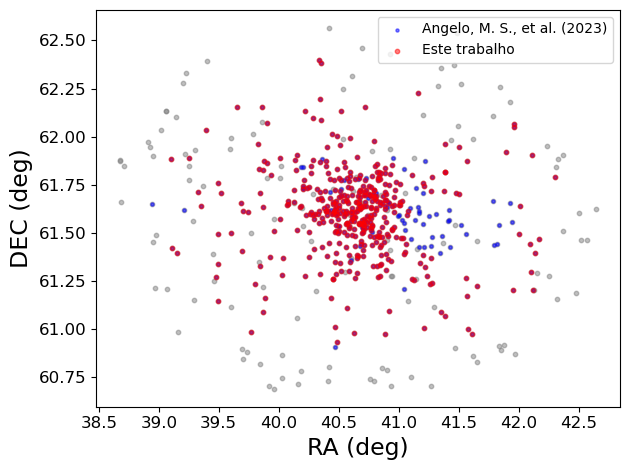

In [47]:
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

ax1.scatter(data["RAJ2000"], data["DEJ2000"],color='grey',alpha=0.5,s=10)
img = ax1.scatter(data_mm["RAJ2000"][mateus], data_mm["DEJ2000"][mateus],color='blue',alpha=0.5,s=5,label='Angelo, M. S., et al. (2023)')
ax1.scatter(data_mm["RAJ2000"][marie], data_mm["DEJ2000"][marie],color='red',alpha=0.5,s=10,label='Este trabalho')
#ax1.scatter(ra_mm, de_mm,color='blue',alpha=0.5,s=5)
ax1.set_ylabel("DEC (deg)",fontsize=17)
ax1.set_xlabel("RA (deg)",fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

## Comparando as populações Marie e Emily

In [43]:
emily,= np.where(data_mh["Prob"]>0.7)
marie, = np.where(data_mh["flag_member"]==1.)
marie_emily, = np.where((data_mh["Prob"]>0.7)&(data_mh["flag_member"]==1.))

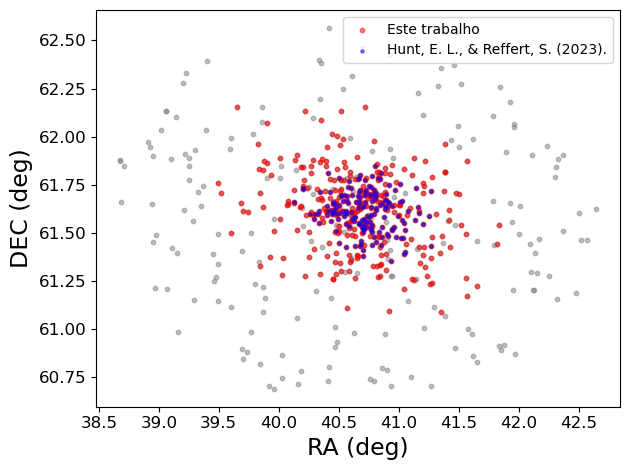

In [53]:
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

ax1.scatter(data["RAJ2000"], data["DEJ2000"],color='grey',alpha=0.5,s=10)
ax1.scatter(data_mh["RAJ2000"][marie], data_mh["DEJ2000"][marie],color='red',alpha=0.5,s=10,label='Este trabalho')
ax1.scatter(data_mh["RAJ2000"][emily], data_mh["DEJ2000"][emily],color='blue',alpha=0.5,s=5,label='Hunt, E. L., & Reffert, S. (2023).')

#ax1.scatter(ra_mm, de_mm,color='blue',alpha=0.5,s=5)
ax1.set_ylabel("DEC (deg)",fontsize=17)
ax1.set_xlabel("RA (deg)",fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

In [49]:
len(data_mh["RAJ2000"][emily])

169

In [50]:
len(data_mh["RAJ2000"][marie])

405

In [59]:
len(data_mh["RAJ2000"][marie_emily])

169

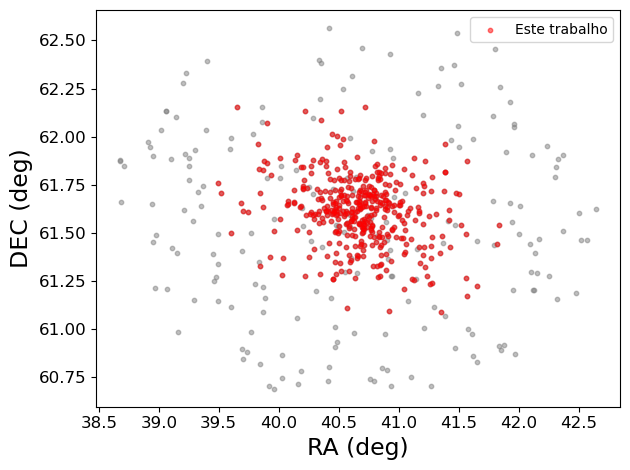

In [54]:
%matplotlib inline
fig,ax1 = plt.subplots(tight_layout=True)

ax1.scatter(data["RAJ2000"], data["DEJ2000"],color='grey',alpha=0.5,s=10)
ax1.scatter(data_mh["RAJ2000"][marie], data_mh["DEJ2000"][marie],color='red',alpha=0.5,s=10,label='Este trabalho')
#ax1.scatter(data_mh["RAJ2000"][emily], data_mh["DEJ2000"][emily],color='blue',alpha=0.5,s=5,label='Hunt, E. L., & Reffert, S. (2023).')

#ax1.scatter(ra_mm, de_mm,color='blue',alpha=0.5,s=5)
ax1.set_ylabel("DEC (deg)",fontsize=17)
ax1.set_xlabel("RA (deg)",fontsize=17)
ax1.tick_params(axis='both', which='major', labelsize=12)
plt.legend()

In [58]:
len(data_mm["RAJ2000"][marie])

405

In [56]:
len(data_mm["RAJ2000"][mateus])

468

In [57]:
len(data_mm["RAJ2000"][marie_mateus])

407